In [14]:
import torch # importa pytorch
from torch import nn # importa classes de redes neurais
from torch.optim import SGD # importa classe de Stochastic Gredient Descent
import matplotlib.pyplot as plt

# Objetivo da rede: identificar o padrão entre X (previsores) e Y (target)

In [15]:
X = [[1,2], [3,4], [5,6],[7,8]]
Y = [[3],[7],[11],[15]]

In [16]:
# transforma os arrays em tensores
X = torch.tensor(X).float() # converte para float, pq é o que rede neural precisa
Y = torch.tensor(Y).float()
X.shape, Y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
X.to(device)
Y.to(device)

cuda


tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]], device='cuda:0')

In [18]:
# cria uma classe para uma rede neural personalizada, a partir da classe nn
class myNeuralNet(nn.Module): # cria a classe a partir de nn.Module, uma classe com backend para rede neural
    def __init__(self): # função de inialização do objeto
        super().__init__() # garante que as funcionalidades de nn.Module foram propriamente inicializadas
        self.layer1 = nn.Linear(2,8) # camada densa linear que recebe 2 valores e retrona 8
        self.layer2 = nn.ReLU() # camada de ativação 
        self.layer3 = nn.Linear(8, 1) # camada de saída, densa e linear que recebe 8 valores e retorna 1
    
    def forward(self, x): # função que descreve o fluxo dos dados dentro da estrutura da rede definida em __init__
        x = self.layer1(x) # camada 1 recebe o input 2x1
        x = self.layer2(x) # camada 2 recebe o input 8x1
        x = self.layer3(x) # camda 3, de saída, recebe o input 8x1
        return x # retorna o output da camada 3, que é um único valor
    

In [19]:
model = myNeuralNet() # inicializa uma instância da rede neural

In [20]:
# visualizando a arquiterura com torchviz
make_dot(model(X), params = dict(model.named_parameters())).render("dense_network", format='png')

'dense_network.png'

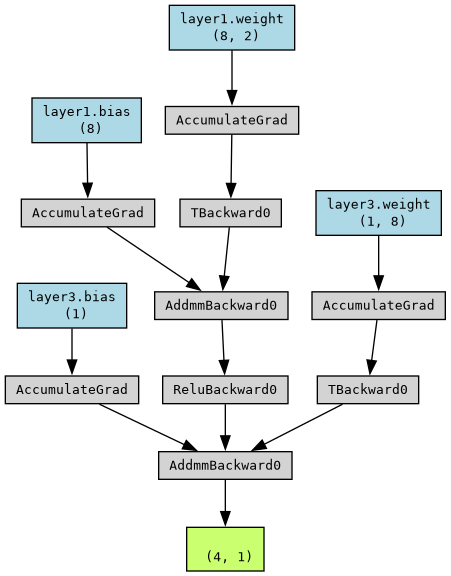

In [21]:
from IPython.display import Image, display

# Specify the path to the PNG file
image_path = "/kaggle/working/dense_network.png"

# Display the image
display(Image(filename=image_path))

In [22]:
# visualizando os pesos da camada 1
model.layer1.weight

Parameter containing:
tensor([[-0.3109,  0.2941],
        [-0.1712, -0.5079],
        [-0.5707,  0.2151],
        [ 0.3133, -0.2949],
        [-0.6309, -0.0547],
        [ 0.2704, -0.6841],
        [ 0.5337, -0.6808],
        [ 0.3766, -0.0506]], requires_grad=True)

In [23]:
# determinação da função de erro
loss_func = nn.MSELoss() # uso da MSE dado que é um problema de regressão

In [24]:
# determinação do otimizador
opt = SGD(model.parameters(), lr = 0.001) # cria uma instância de SGD com taxa de aprendizado de 0.001

In [25]:
# loop de treino

losses = [] # lista que armazenará os erros de cada passo na descida do gradiente
for _ in range(50): # irá iterar por 50 epochs
    opt.zero_grad() # zera todos os gradientes antes de cada epoch 
    loss_value = loss_func(model(X), Y) # calcula o erro a partir dos valores prevists model(X) e os valores reais Y
    loss_value.backward() # aplica backpropagtion e armazena os valores dos gradientes no parâmetro .grad de cada elemento treinavel em cada tensor
    opt.step() # aplica o gradiente aos elementos
    losses.append(loss_value.detach().numpy()) # copia o valor de erro atual, converte para array e adiciona a lista losses

Text(0, 0.5, 'loss')

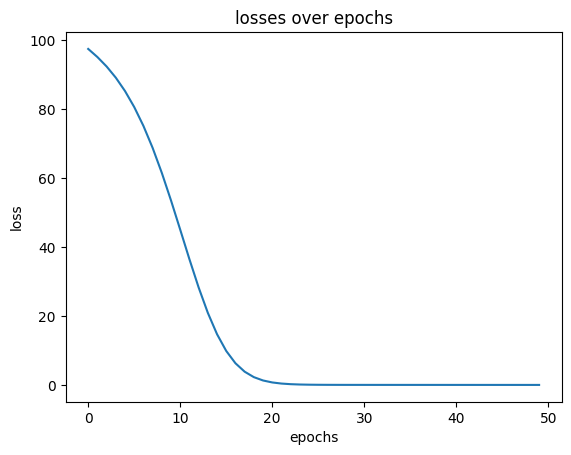

In [26]:
# plotagem dos erros
plt.plot(losses)
plt.title('losses over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')